<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Causal Inference In Statistics - A Primer</h1>
        <h1>3.1 Interventions</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
    <div style="float: right; margin-right:10px;"> <p><a href="https://amzn.to/3gsFlkO" target=_blank><img src='data/causality.jpeg' width='100px'>
        <!--Amazon Affiliate Link--></a></p></div>
</div>

In [1]:
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 

from CausalModel import CausalModel

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

watermark  2.0.2
json       2.0.9
pandas     1.0.1
matplotlib 3.1.3
numpy      1.18.1
autopep8   1.5
Sun Oct 18 2020 

CPython 3.7.3
IPython 6.2.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : 96fdced5915a840d6140e161f1d2827cf29f6e31


Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Graph Surgery

In [4]:
G = CausalModel()
G.add_causation('Ux', 'X')
G.add_causation('Uy', 'Y')
G.add_causation('Uz', 'Z')
G.add_causation('Z', 'X')
G.add_causation('Z', 'Y')

G.pos = {'Z': (0, 1), 'X': (-1, 0), 'Y':(1, 0), 'Uz':(0, 2), 'Ux':(-1, 1), 'Uy': (1,1)}

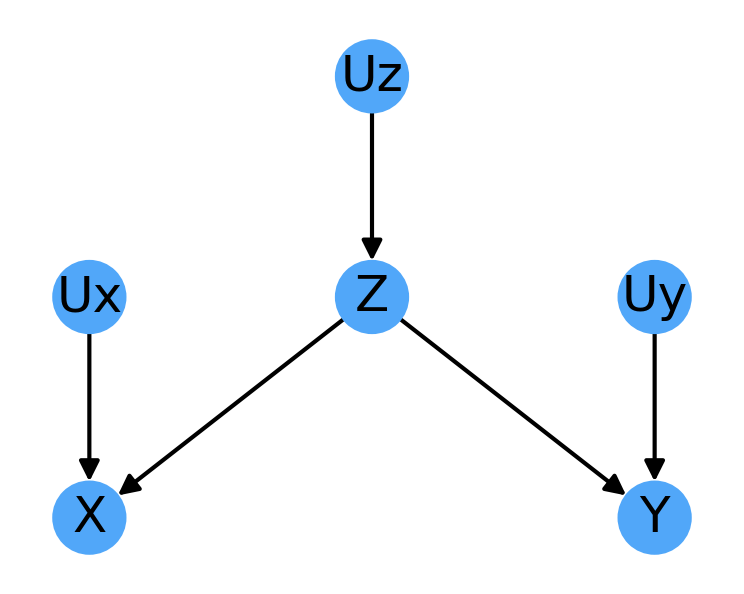

In [5]:
fig, ax = plt.subplots(1, figsize=(3, 2.5))
G.plot(ax=ax)

In [6]:
G.save_model('dags/Primer.Fig.3.1.dot')

In [7]:
G2 = G.copy()
G2.dag.remove_edges_from(list(G.dag.in_edges('X')))
G2.dag.remove_node('Ux')
del G2.pos['Ux']

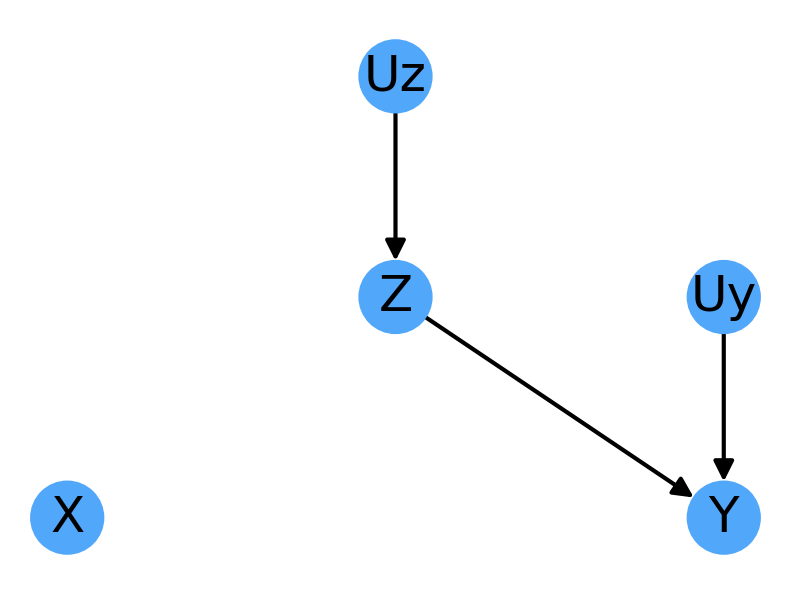

In [8]:
fig, ax = plt.subplots(1, figsize=(3.2, 2.5))
G2.plot(ax=ax)

In [9]:
G2.save_model('dags/Primer.Fig.3.2.dot')

In [10]:
G = CausalModel()
G.add_causation('Ux', 'X')
G.add_causation('Uy', 'Y')
G.add_causation('Uz', 'Z')
G.add_causation('Z', 'X')
G.add_causation('Z', 'Y')
G.add_causation('X', 'Y')

G.pos = {'Z': (0, 1), 'X': (-1, 0), 'Y':(1, 0), 'Uz':(0, 2), 'Ux':(-1, 1), 'Uy': (1,1)}

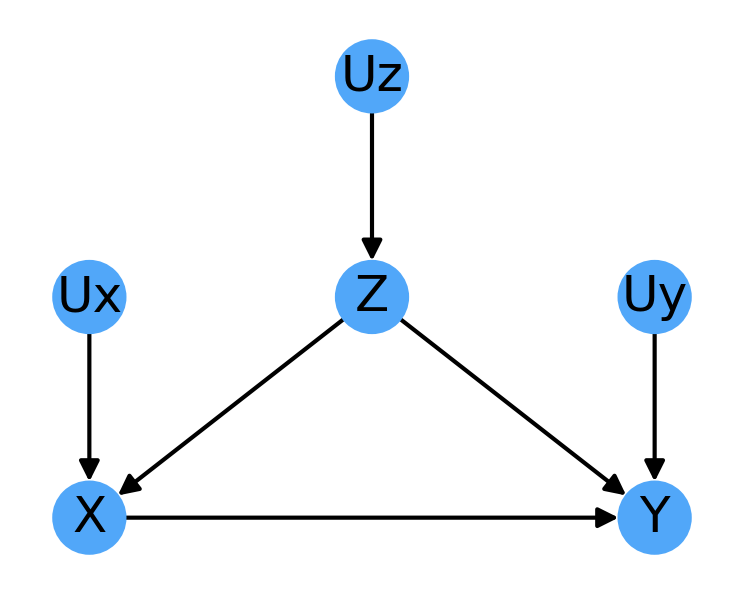

In [11]:
fig, ax = plt.subplots(1, figsize=(3, 2.5))
G.plot(ax=ax)

In [12]:
G.save_model('dags/Primer.Fig.3.3.dot')

In [13]:
G2 = G.intervention_graph('X', drop_nodes=True)

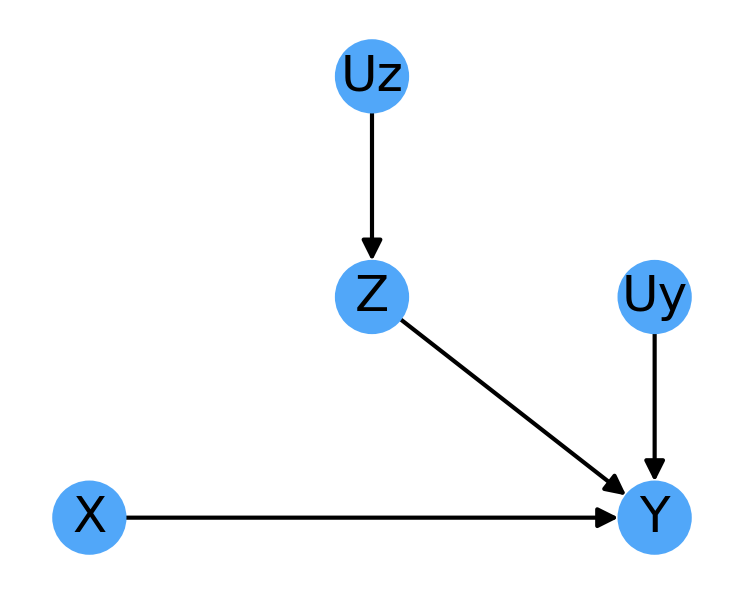

In [14]:
fig, ax = plt.subplots(1, figsize=(3, 2.5))
G2.plot(ax=ax)

In [15]:
G.save_model('dags/Primer.Fig.3.4.dot')

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>